# $\mathtt{pdf}$ averaged over bins that are univofrm in the logarithmic scale

Required codes are from files

* __spile.py__
* __io2arr.py__


> <span style="background-color:yellow; color:blue;">Input file is not attached. Its name is given by variable __iname__ in the following cells.</span>

> The required structure of the input file:
* Lines that start with non-digit are comments; they are ignored
* The other lines must contain at least two numbers separated by a gap or tabulation. These numbers are integers or float
* The first number indicates the time of event, the second number indicates the size. The probability distribution of sizes is computed

__Preliminary computation__

* probability distribution function on [0, <code>smax</code>]
* its approximation as the average over the exponentially increasing bins
* choose your own input and output files in the next cell


In [1]:
from spile import sfr_av
#iname = f'.vscode/cat256btw1.txt'
iname = 'cat256btw1v.txt'
gap = 1.2 #the bins are (s / gap, s * gap)
smax = 1e+6 #maximal considered size
s_bound_l = 10 #size border between the exact function and its approximation
s_bound_r = 100 #exact pdf extends to this size in a weak color as a background of approximation

#---Approximation
#recommended to compute the approximation once and save it choosing issave=1
#oname=<name> changes the default output name
#the code does not verify the existence of folders; this the responsibility of a user
pdfav_name = f'pdf_av_gap{gap}_cat256btw1.txt'
#the output file consists of two columns: size and the estimate of the pdf
s, freq, t_lng, q, s_out_of_arr = sfr_av(iname, smax, issave=1, oname=pdfav_name, gap=gap)
#the output variables:
#s - size, freq - pdf-function, t_lng - time difference between the last and first records, 
#q - frequences (without normalization), s_out_of_arr - the number of avalanches with size > smax
#These variables are ignored here and s and freq will be reloaded from the file
#---Computed and saved

#---Exact empirical pdf
from spile import sfr_exact
#input file <iname> (float)time (float)size anything
#Assumed that size is integer (but can be written in a float format);
#only size < smax are used in the construction
#oname = <oname> makes the function write the output to the specified file
#the output file consists of two columns: size and pdf
pdf_name = 'pdf_cat256btw1.txt'
s_exact, freq_exact, t_lng = sfr_exact(iname, smax=1000, oname=pdf_name)
#---Computed and saved


FileNotFoundError: [Errno 2] No such file or directory: 'cat256btw1v.txt'

__Graph of the size-frequency relation__

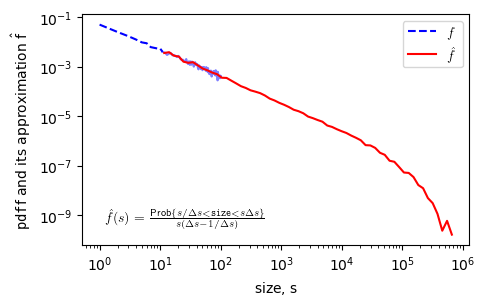

In [5]:
#size-frequency relation
import numpy as np
import matplotlib.pyplot as plt
from bisect import bisect
from io2arr import file2twoarr #my function that reads two column files
# best values of s_bound_l and s_bound_r depend on the value of gap from the previous cell
s_bound_l = 35 #border between the exact function and its approximation
s_bound_r = 50 #exact pdf extends to this value in a weak color
s_exact, freq_exact = file2twoarr(pdf_name) #reads exact pdf from file
s, freq = file2twoarr(pdfav_name) #reads the estimate of pdf from file

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
rc_fonts = { #include TeX (optional)
    #'font.size': 8,
    "text.usetex": True,
    'mathtext.default': 'regular',
    "text.latex.preamble": r"\usepackage{bm,amssymb,amsmath}",
}
plt.rcParams.update(rc_fonts)
clr = 'blue' #color for the graph
#define index borders for the graphs
i_exact_1 = bisect(s_exact, s_bound_l)
i_exact_2 = bisect(s_exact, s_bound_r)
i_l = bisect(s, s_bound_l)
ax.plot(s_exact[:i_exact_1+1], freq_exact[:i_exact_1+1], label='$f$', color=clr, linestyle='--')
ax.plot(s_exact[i_exact_1:i_exact_2], freq_exact[i_exact_1:i_exact_2], 
        color=clr, alpha=0.5)
ax.plot(s[i_l:], freq[i_l:], label=r'$\hat{{f}}$', color='red')
txt=r'$\hat{f}(s)=\frac{\mathsf{Prob}\{s/\Delta s < \mathtt{size} < s\Delta s\}}{s(\Delta s-1/\Delta s)}$'
ax.text(0.06, 0.10, txt, 
        transform = ax.transAxes, horizontalalignment='left')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('size, $s$')
ax.set_ylabel(r'$\mathtt{pdf} f$ and its approximation $\hat{f}$')
plt.show()
plt.rcdefaults()  # restore the defaults changed with plt.rcParams.update()

__Multiplication by $s$__

* the graphs becomes closer to a horizontal line
* single label is used to implement into the code with several lattice length

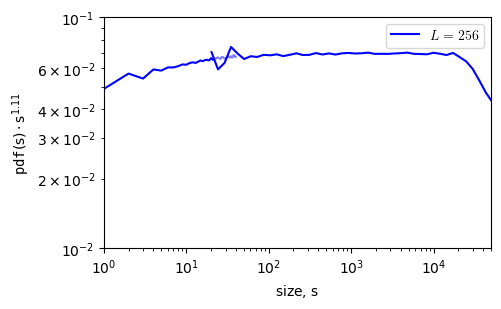

In [16]:
#size-frequency relation
import numpy as np
import matplotlib.pyplot as plt
from bisect import bisect
from io2arr import file2twoarr #my function that reads two column files
lng = 256 #Lattice length
gamma = 1.11 #Vertical coordinates are mutliplied by s**gamma
s_bound_l = 20 #border between the exact function and its approximation
s_bound_r = 40 #exact pdf extends to this value in a weak color
s_exact, freq_exact = file2twoarr(pdf_name) #reads exact pdf from file
s, freq = file2twoarr(pdfav_name) #reads the estimate of pdf from file

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
rc_fonts = { #include TeX (optional)
    #'font.size': 8,
    "text.usetex": True,
    'mathtext.default': 'regular',
    "text.latex.preamble": r"\usepackage{bm,amssymb,amsmath}",
}
plt.rcParams.update(rc_fonts)
clr = 'blue' #color for the graph
#define index borders for the graphs
i_exact_1 = bisect(s_exact, s_bound_l)
i_exact_2 = bisect(s_exact, s_bound_r)
i_l = bisect(s, s_bound_l)
ax.plot(s_exact[:i_exact_1+1], 
        np.array(freq_exact[:i_exact_1+1])*np.array(s_exact[:i_exact_1+1])**gamma,
        label=r'$L = {:d}$'.format(lng), color=clr)
ax.plot(s_exact[i_exact_1:i_exact_2], 
        np.array(freq_exact[i_exact_1:i_exact_2])*np.array(s_exact[i_exact_1:i_exact_2])**gamma, 
        color=clr, alpha=0.5)
ax.plot(s[i_l:], np.array(freq[i_l:])*np.array(s[i_l:])**gamma, color=clr)
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('size, $s$')
gamma_txt = f'{gamma}'
ax.set_ylabel('$\mathtt{{pdf}}(s)\cdot s^{{{:s}}}$'.format(gamma_txt))
#ax.set_ylabel(r'$\mathtt{pdf}(s)\cdot s^{:s}$'.format(gamma_txt))
ax.set_xlim(1, 5e+4)
ax.set_ylim(1e-2, 1e-1)
plt.show()
plt.rcdefaults()  # restore the defaults changed with plt.rcParams.update()